In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as psql
from unicodedata import normalize

df=pd.read_csv("/Users/imanqureshi/Downloads/Electric_Vehicle_Population_Data_20240202.csv")
df

In [4]:
df=pd.read_csv("/Users/imanqureshi/Downloads/Electric_Vehicle_Population_Data_20240202.csv")
df.rename(columns = {'Model Year':'Model_Year'}, inplace = True)
df.rename(columns = {'Electric Vehicle Type':'Electric_Vehicle_Type'}, inplace = True)
df.rename(columns = {'Electric Range':'Electric_Range'}, inplace = True)

df

,VIN (1-10),County,City,State,Postal Code,Model_Year,Make,Model,Electric_Vehicle_Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric_Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166795,3FA6P0SU4D,Spokane,Spokane,WA,99223.0,2013,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,6.0,239527123,POINT (-117.369705 47.62637),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306300e+10
166796,5YJYGDEE5M,King,Sammamish,WA,98074.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,148715479,POINT (-122.0313266 47.6285782),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
166797,7SAYGDEE5N,Snohomish,Mukilteo,WA,98275.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,220504406,POINT (-122.299965 47.94171),PUGET SOUND ENERGY INC,5.306104e+10
166798,1G1RH6E43D,Lewis,Mossyrock,WA,98564.0,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,20.0,156418475,POINT (-122.487535 46.5290135),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304197e+10


In [5]:
df['Make'].nunique()

39

In [6]:
df['Make'].unique()

array(['FIAT', 'TESLA', 'BMW', 'RIVIAN', 'CHRYSLER', 'CHEVROLET', 'KIA',
       'FORD', 'TOYOTA', 'NISSAN', 'MITSUBISHI', 'HONDA', 'AUDI', 'JEEP',
       'VOLVO', 'HYUNDAI', 'VOLKSWAGEN', 'SUBARU', 'LUCID', 'MINI',
       'POLESTAR', 'SMART', 'LINCOLN', 'MERCEDES-BENZ', 'LEXUS',
       'PORSCHE', 'ALFA ROMEO', 'DODGE', 'JAGUAR', 'CADILLAC',
       'LAND ROVER', 'MAZDA', 'GENESIS', 'FISKER', 'GMC', 'TH!NK',
       'WHEEGO ELECTRIC CARS', 'AZURE DYNAMICS', 'BENTLEY'], dtype=object)

In [7]:
#SORTED BY YEAR
#d='SELECT DISTINCT(Make), Model,Model_Year as Year,Electric_Range as Range, COUNT(Make) as number_Sold FROM df GROUP BY Model ORDER BY Year desc'
#SORTED BY NUMBER OF CARS SOLD
d='SELECT DISTINCT(Make), Model,Model_Year as Year,Electric_Range as Range, COUNT(Make) as number_Sold FROM df GROUP BY Model ORDER BY number_Sold desc'
sortedCars=psql.sqldf(d)
sortedCars.head(15)



,Make,Model,Year,Range,number_Sold
0,TESLA,MODEL Y,2023,0,32822
1,TESLA,MODEL 3,2020,322,28926
2,NISSAN,LEAF,2013,75,13274
3,TESLA,MODEL S,2017,210,7611
4,CHEVROLET,BOLT EV,2017,238,6413
5,TESLA,MODEL X,2017,200,5429
6,CHEVROLET,VOLT,2018,53,4825
7,VOLKSWAGEN,ID.4,2023,0,3647
8,JEEP,WRANGLER,2022,22,3161
9,FORD,MUSTANG MACH-E,2023,0,3107


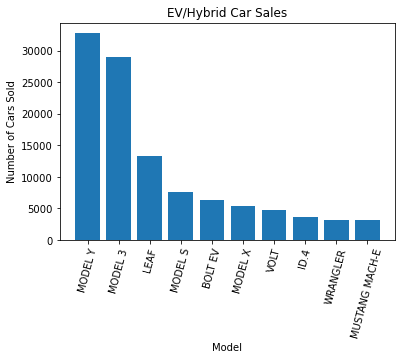

In [8]:
plt.bar(sortedCars.head(10)['Model'], sortedCars.head(10)['number_Sold'])
plt.xlabel('Model')
plt.ylabel('Number of Cars Sold')
plt.title('EV/Hybrid Car Sales')
plt.xticks(rotation=75)
plt.show()

In [9]:
sortedCars.shape

(138, 5)

In [10]:
sortedCars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Make         138 non-null    object
 1   Model        138 non-null    object
 2   Year         138 non-null    int64 
 3   Range        138 non-null    int64 
 4   number_Sold  138 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 5.5+ KB


In [11]:
print(sortedCars['Make'].unique())
print(sortedCars['Model'].unique())
print(sortedCars['Year'].unique())


['TESLA' 'NISSAN' 'CHEVROLET' 'VOLKSWAGEN' 'JEEP' 'FORD' 'KIA' 'CHRYSLER'
 'TOYOTA' 'BMW' 'HYUNDAI' 'RIVIAN' 'VOLVO' 'AUDI' 'MITSUBISHI' 'POLESTAR'
 'HONDA' 'FIAT' 'SUBARU' 'MINI' 'PORSCHE' 'MAZDA' 'MERCEDES-BENZ' 'LUCID'
 'JAGUAR' 'LEXUS' 'LINCOLN' 'SMART' 'CADILLAC' 'GENESIS' 'LAND ROVER'
 'ALFA ROMEO' 'DODGE' 'FISKER' 'AZURE DYNAMICS' 'TH!NK'
 'WHEEGO ELECTRIC CARS' 'GMC' 'BENTLEY']
['MODEL Y' 'MODEL 3' 'LEAF' 'MODEL S' 'BOLT EV' 'MODEL X' 'VOLT' 'ID.4'
 'WRANGLER' 'MUSTANG MACH-E' 'NIRO' 'PACIFICA' 'PRIUS PRIME' 'X5'
 'IONIQ 5' 'EV6' 'I3' 'RAV4 PRIME' 'FUSION' 'R1S' 'R1T' 'BOLT EUV' 'C-MAX'
 'XC90' 'F-150' 'E-TRON' 'E-GOLF' 'XC60' 'I4' 'XC40' 'GRAND CHEROKEE'
 'PRIUS PLUG-IN' 'OUTLANDER' 'PS2' 'CLARITY' '500' 'SOLTERRA' 'IX' 'Q5 E'
 'KONA ELECTRIC' 'HARDTOP' 'TAYCAN' 'SORENTO' 'ARIYA' 'A3' 'SPORTAGE' 'Q4'
 '330E' '530E' 'C40' 'SOUL' 'CX-90' 'ESCAPE' 'CAYENNE' 'EDV' 'TRANSIT'
 'X3' 'EQB-CLASS' 'IONIQ 6' 'SPARK' 'FOCUS' 'AIR' 'Q8' 'EQE-CLASS SUV'
 'BZ4X' 'IONIQ' 'I-PACE' 'KONA' 'COUN

In [12]:
sortedCars["Year"] = 2020
sortedCars.head()

,Make,Model,Year,Range,number_Sold
0,TESLA,MODEL Y,2020,0,32822
1,TESLA,MODEL 3,2020,322,28926
2,NISSAN,LEAF,2020,75,13274
3,TESLA,MODEL S,2020,210,7611
4,CHEVROLET,BOLT EV,2020,238,6413


In [13]:
sortedCars["Range"][0]=310


<ipython-input-13-84a13998bacf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sortedCars["Range"][0]=310


In [22]:
carCorr=sortedCars.corr()

<AxesSubplot:>

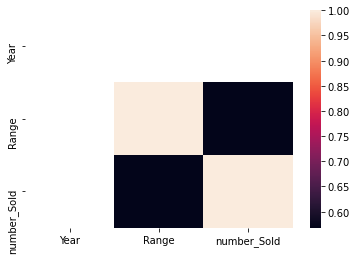

In [23]:
sns.heatmap(carCorr)

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
x=sortedCars['Range']
y=sortedCars['number_Sold']

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.4,random_state=23)
X_train=np.array(X_train).reshape(-1,1)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr=LinearRegression()

In [31]:
lr.fit(X_train,Y_train)

LinearRegression()

In [32]:
c=lr.intercept_

In [33]:
c

-646.7791175216162

In [34]:
m=lr.coef_

In [35]:
m

array([44.56805403])

In [37]:
Y_pred_train=m*X_train+c

In [38]:
Y_pred_train

array([[ -646.77911752],
       [ 4924.22763596],
       [ 1046.80693554],
       [ -646.77911752],
       [  779.39861137],
       [  823.9666654 ],
       [ -646.77911752],
       [  556.55834123],
       [  -22.82636113],
       [ 3810.02628526],
       [  333.71807109],
       [ 1938.16801609],
       [ 1135.94304359],
       [  110.87780095],
       [  -22.82636113],
       [  601.12639526],
       [  779.39861137],
       [ -201.09857724],
       [  823.9666654 ],
       [  422.85417915],
       [  913.10277345],
       [ -646.77911752],
       [ 9158.1927686 ],
       [ -646.77911752],
       [ -646.77911752],
       [ 3230.6415829 ],
       [ -646.77911752],
       [ -646.77911752],
       [ -646.77911752],
       [ 1046.80693554],
       [ -646.77911752],
       [  -67.39441516],
       [13169.31763111],
       [ 1938.16801609],
       [ 1091.37498956],
       [  155.44585498],
       [  200.01390901],
       [ 2740.39298859],
       [ 1091.37498956],
       [  110.87780095],


In [39]:
y_pred_train=lr.predict(X_train)

In [40]:
y_pred_train

array([ -646.77911752,  4924.22763596,  1046.80693554,  -646.77911752,
         779.39861137,   823.9666654 ,  -646.77911752,   556.55834123,
         -22.82636113,  3810.02628526,   333.71807109,  1938.16801609,
        1135.94304359,   110.87780095,   -22.82636113,   601.12639526,
         779.39861137,  -201.09857724,   823.9666654 ,   422.85417915,
         913.10277345,  -646.77911752,  9158.1927686 ,  -646.77911752,
        -646.77911752,  3230.6415829 ,  -646.77911752,  -646.77911752,
        -646.77911752,  1046.80693554,  -646.77911752,   -67.39441516,
       13169.31763111,  1938.16801609,  1091.37498956,   155.44585498,
         200.01390901,  2740.39298859,  1091.37498956,   110.87780095,
        2116.4402322 ,  3230.6415829 ,   823.9666654 ,  3810.02628526,
        8445.10390416,  -646.77911752,  -111.96246919,  -646.77911752,
         645.69444929,   200.01390901,  -646.77911752, 13704.13427945,
         645.69444929,  -646.77911752,  -646.77911752,    66.30974692,
      

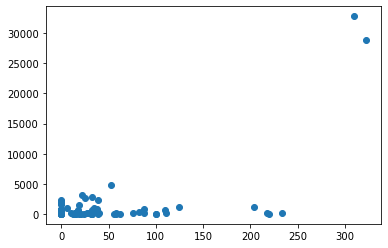

In [41]:
plt.scatter(X_train,Y_train)
